# TASK3

## CUSTOMER CHURN  PREDICTION

Develop a model to predict customer churn for a subscription-based service or business. Use historical customer data, including features like usage behavior and customer demographics, and try algorithms like **Logistic Regression, Random Forests, or Gradient Boosting to predict churn.**

### Data dictionary

1. **RowNumber:** Row number
2. **CustomerId:** ID Customer
3. **Surname:** Customer's surname
4. **CreditScore:** Customer's credit score
5. **Geography:** Customer's country
6. **Gender:** Customer's gender
7. **Age:** Customer's age
8. **Tenure:** Number of years the customer has been with the company
9. **Balance:** Customer's bank account balance
10. **NumOfProducts:** Number of products the customer has subscribed to
11. **HasCrCard:** Whether the customer has a credit card (1 = Yes, 0 = No).
12. **IsActiveMember:** Whether the customer is an active member (1 = Yes, 0 = No).
13. **EstimatedSalary:** Customer's estimated salary
14. **Exited:** Whether the customer has churned (1 = Yes, 0 = No).

In [1]:
import pandas as pd
import math
import numpy as np
import scipy.stats as stats
from scipy.stats import binom
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm


from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("Churn_Modelling.csv")

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [5]:
df.shape

(10000, 14)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


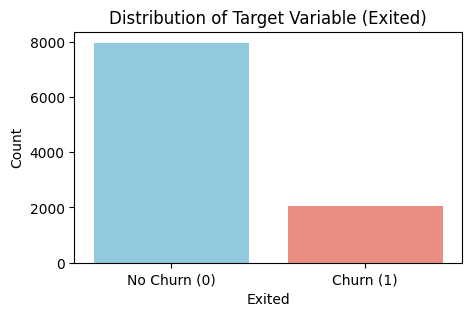

In [23]:
import seaborn as sns

plt.figure(figsize=(5, 3))
sns.countplot(data=df, x='Exited', palette=['skyblue', 'salmon'])
plt.title('Distribution of Target Variable (Exited)')
plt.xlabel('Exited')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['No Churn (0)', 'Churn (1)'])
plt.show()

In [7]:
# Remove irrelevant columns
data_cleaned = df.drop(columns=['RowNumber', 'CustomerId', 'Surname'])

In [8]:
from sklearn.preprocessing import LabelEncoder
# Transform categorical variables
label_encoder = LabelEncoder()
data_cleaned['Geography'] = label_encoder.fit_transform(data_cleaned['Geography'])
data_cleaned['Gender'] = label_encoder.fit_transform(data_cleaned['Gender'])

In [9]:
# Check for missing values
missing_values = data_cleaned.isnull().sum()

data_cleaned.head(), missing_values

(   CreditScore  Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
 0          619          0       0   42       2       0.00              1   
 1          608          2       0   41       1   83807.86              1   
 2          502          0       0   42       8  159660.80              3   
 3          699          0       0   39       1       0.00              2   
 4          850          2       0   43       2  125510.82              1   
 
    HasCrCard  IsActiveMember  EstimatedSalary  Exited  
 0          1               1        101348.88       1  
 1          0               1        112542.58       0  
 2          1               0        113931.57       1  
 3          0               0         93826.63       0  
 4          1               1         79084.10       0  ,
 CreditScore        0
 Geography          0
 Gender             0
 Age                0
 Tenure             0
 Balance            0
 NumOfProducts      0
 HasCrCard          0
 IsActiveMember  

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
# Features (X) and target variable (y)
X = data_cleaned.drop(columns=['Exited'])
y = data_cleaned['Exited']

In [12]:
# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8000, 10), (2000, 10), (8000,), (2000,))

### Logistic Regression

In [13]:
from sklearn.linear_model import LogisticRegression

# Train the Logistic Regression model
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)

# Predict with the test set
y_pred_log_reg = log_reg.predict(X_test)

In [14]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_log_reg)
class_report = classification_report(y_test, y_pred_log_reg)
conf_matrix = confusion_matrix(y_test, y_pred_log_reg)

print(f"Accuracy: {accuracy}")
print("\nClassification Report:\n", class_report)
print("\nConfusion Matrix:\n", conf_matrix)

Accuracy: 0.8005

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.98      0.89      1607
           1       0.45      0.07      0.12       393

    accuracy                           0.80      2000
   macro avg       0.63      0.53      0.51      2000
weighted avg       0.74      0.80      0.74      2000


Confusion Matrix:
 [[1573   34]
 [ 365   28]]


### Random Forest

In [15]:
from sklearn.ensemble import RandomForestClassifier

# Train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict with the test set
y_pred_rf = rf_model.predict(X_test)

In [16]:
# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
class_report_rf = classification_report(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

print(f"Random Forest Accuracy: {accuracy_rf}")
print("\nRandom Forest Classification Report:\n", class_report_rf)
print("\nRandom Forest Confusion Matrix:\n", conf_matrix_rf)

Random Forest Accuracy: 0.8645

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.75      0.47      0.57       393

    accuracy                           0.86      2000
   macro avg       0.82      0.71      0.75      2000
weighted avg       0.85      0.86      0.85      2000


Random Forest Confusion Matrix:
 [[1546   61]
 [ 210  183]]


### Gradient Boosting

In [17]:
from sklearn.ensemble import GradientBoostingClassifier

# Train the Gradient Boosting model
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)

# Predict with the test set
y_pred_gb = gb_model.predict(X_test)

In [18]:
# Evaluate the model
accuracy_gb = accuracy_score(y_test, y_pred_gb)
class_report_gb = classification_report(y_test, y_pred_gb)
conf_matrix_gb = confusion_matrix(y_test, y_pred_gb)

print(f"Gradient Boosting Accuracy: {accuracy_gb}")
print("\nGradient Boosting Classification Report:\n", class_report_gb)
print("\nGradient Boosting Confusion Matrix:\n", conf_matrix_gb)

Gradient Boosting Accuracy: 0.8655

Gradient Boosting Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.75      0.47      0.58       393

    accuracy                           0.87      2000
   macro avg       0.82      0.72      0.75      2000
weighted avg       0.86      0.87      0.85      2000


Gradient Boosting Confusion Matrix:
 [[1547   60]
 [ 209  184]]


### CONCLUSION

Based on the performance metrics, both Random Forest and Gradient Boosting emerged as the top contenders for the churn prediction task. They both significantly outperformed logistic regression, particularly in terms of recall and F1-score, which are critical for churn prediction as they reflect the mode's ability to identify true positives and minimize false negatives.

Gradient Boosting has a slight advantage over Randome Forest in terms of precision and F1 Score, making it the best overall model for this task therefore is the best model for predicting churn due to its superior balance between precision and recall, ensuring a robust and reliable prediction of potential churners.